<a href="https://colab.research.google.com/github/firasaz/ML-For_Beginners/blob/main/ML_For_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Regression 101

## import necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

## Load and sample a portion of the dataset

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

print(X.shape) # returns (<rows>, <columns>)

X_portion = X[:, 2] # take the 3rd column's, aka feature's, value from each row
X_portion = X_portion.reshape(-1,1)

(442, 10)


### Understanding the imported data:

#### loading the dataset without passing parameter values(default values):
> default values:
- return_X_y=False: returns a dictionary where you can access different elements of the dataset using the key.
- as_frame=False: returns the data as numpy arrays.
- scaled=True: feature variables are mean centered using standard deviation times square root of n_samples, in this case 442 rows/samples.

In [3]:
dataset1 = datasets.load_diabetes()

print(dataset1.keys())
print()
print(f"Data:\n{dataset1['data'][:3]}") # 1st three rows of the data
print(f"Target:\n{dataset1['target'][:3]}")

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Data:
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
Target:
[151.  75. 141.]


#### loading the dataset with argument 'return_X_y=True' to seprate the data from the target.
> ok so i'm trying to understand the data below. here's my notes:
- return_X_y=True: argument returns a tuple containing the data and the target column from the data into a separate numpy array.
  - the data element returns a 2D array, meaning a numpy array containing a numpy array, containing the rows of the dataset as numpy arrays.
  - the target element of the tuple returns a 1D array, meaning one array with n elements.

In [4]:
dataset2 = datasets.load_diabetes(return_X_y=True)

print(f'1st element of the loaded dataset length(rows):\n\t{len(dataset2[0])}')
print(f'1st element of the 1st element of the loaded dataset length(1st row values):\n\t{len(dataset2[0][0])}')
print(f'2nd element of the loaded dataset length(target):\n\t{len(dataset2[1])}')
print()
print(dataset2[0][:3]) # first 3 rows of the data
print(dataset2[1][:3]) # first 3 values of the target

1st element of the loaded dataset length(rows):
	442
1st element of the 1st element of the loaded dataset length(1st row values):
	10
2nd element of the loaded dataset length(target):
	442

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[151.  75. 141.]


#### loading the dataset with argument 'as_dframe=True':
> dataset is returned as a panda dataframe. yay! 

In [5]:
dataset3 = datasets.load_diabetes(as_frame=True)

print(f"Data:\n{dataset3.data.head()[['age','sex','bmi','bp','s1']]}")
print(f'Target:\n{dataset3.target.head()}')
# print(dataset3.data)

Data:
        age       sex       bmi        bp        s1
0  0.038076  0.050680  0.061696  0.021872 -0.044223
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449
2  0.085299  0.050680  0.044451 -0.005670 -0.045599
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191
4  0.005383 -0.044642 -0.036385  0.021872  0.003935
Target:
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


## split the data into training and testing parts then train the regression model imported from sklearn

In [6]:
# train the model on 67% of the dataset and test it against 33% of the data.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_portion, y, test_size=0.33)

model = linear_model.LinearRegression() # import the Linear Regression model
model.fit(X_train, y_train) # train the imported model

y_pred = model.predict(X_test) # save the predictions of the trained model in 'y_pred'
y_pred = [round(x,2) for x in y_pred] # store the predictions with 2 decimal spaces

In [7]:
print(len(y_train))
print(len(y_test))
print()
print(len(X_train))
print(len(X_test))

print(y_pred[:5])
print(y_test[:5])

296
146

296
146
[144.74, 214.0, 122.66, 270.21, 169.83]
[257.  95.  84. 341.  69.]


In [8]:
y_pred = [round(x,2) for x in y_pred]
print(y_pred[:5])

[144.74, 214.0, 122.66, 270.21, 169.83]


## plot the data for visualization

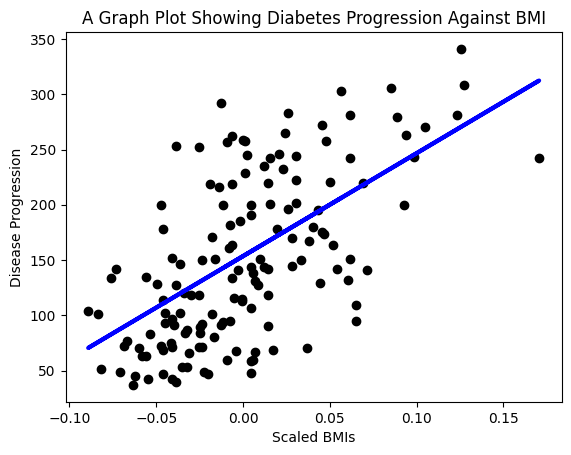

In [9]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()